In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


In [17]:
df1 = pd.read_csv('/content/drive/My Drive/AIML/Capstone/Fine_2006_2019_Finger_millet_Min.csv')
df1.head()

,Arrival Date,variety,Min_price
0,02-01-06,Fine,540
1,03-01-06,Fine,580
2,04-01-06,Fine,600
3,06-01-06,Fine,550
4,08-01-06,Fine,600


In [0]:
df1['Arrival Date'] = pd.to_datetime(df1['Arrival Date'])

In [0]:
df1 = df1.set_index('Arrival Date').asfreq('D')

In [20]:
df1.head()

,variety,Min_price
Arrival Date,,
2006-02-01,Fine,540.0
2006-02-02,Fine,540.0
2006-02-03,Fine,540.0
2006-02-04,Fine,540.0
2006-02-05,NaN,NaN


In [0]:
ndf = df1.fillna(method='ffill')

In [0]:
ndf.to_csv('/content/drive/My Drive/AIML/Capstone/Finger_millet_2006_2019_Complete.csv', encoding='utf-8')

In [26]:
df = pd.read_csv('/content/drive/My Drive/AIML/Capstone/Finger_millet_2006_2019_Complete.csv')
df.head()

,Arrival Date,variety,Min_price
0,2006-02-01,Fine,540.0
1,2006-02-02,Fine,540.0
2,2006-02-03,Fine,540.0
3,2006-02-04,Fine,540.0
4,2006-02-05,Fine,540.0


In [0]:

del df['variety']

In [0]:
df1 =df.set_index('Arrival Date')

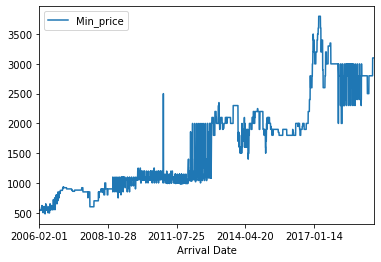

In [30]:
df1.plot()

In [31]:
df1.describe()

,Min_price
count,4879.000000
mean,1636.514040
std,794.042312
min,480.000000
25%,1000.000000
50%,1400.000000
75%,2100.000000
max,3800.000000


In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df1)

In [34]:
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 3415
test: 1464


In [0]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [36]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

3415 1
0
X 0 to 1
[0.01807229]
Y 1
0.01807228915662651
1
X 1 to 2
[0.01807229]
Y 2
0.01807228915662651
2
X 2 to 3
[0.01807229]
Y 3
0.01807228915662651
3
X 3 to 4
[0.01807229]
Y 4
0.01807228915662651
4
X 4 to 5
[0.01807229]
Y 5
0.01807228915662651
5
X 5 to 6
[0.01807229]
Y 6
0.01807228915662651
6
X 6 to 7
[0.01807229]
Y 7
0.01807228915662651
7
X 7 to 8
[0.01807229]
Y 8
0.01807228915662651
8
X 8 to 9
[0.01807229]
Y 9
0.01807228915662651
9
X 9 to 10
[0.01807229]
Y 10
0.01807228915662651
10
X 10 to 11
[0.01807229]
Y 11
0.01807228915662651
11
X 11 to 12
[0.01807229]
Y 12
0.01807228915662651
12
X 12 to 13
[0.01807229]
Y 13
0.01807228915662651
13
X 13 to 14
[0.01807229]
Y 14
0.01807228915662651
14
X 14 to 15
[0.01807229]
Y 15
0.01807228915662651
15
X 15 to 16
[0.01807229]
Y 16
0.01807228915662651
16
X 16 to 17
[0.01807229]
Y 17
0.01807228915662651
17
X 17 to 18
[0.01807229]
Y 18
0.01807228915662651
18
X 18 to 19
[0.01807229]
Y 19
0.018674698795180716
19
X 19 to 20
[0.0186747]
Y 20
0.018072289

In [37]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(3413, 1, 1)
(1462, 1, 1)


In [38]:
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=158, batch_size=batch_size, verbose=2, shuffle=True)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/158





 - 6s - loss: 0.0134
Epoch 2/158
 - 5s - loss: 0.0021
Epoch 3/158
 - 5s - loss: 7.6818e-04
Epoch 4/158
 - 5s - loss: 7.0816e-04
Epoch 5/158
 - 5s - loss: 7.0031e-04
Epoch 6/158
 - 5s - loss: 6.9455e-04
Epoch 7/158
 - 5s - loss: 6.9533e-04
Epoch 8/158
 - 5s - loss: 6.8588e-04
Epoch 9/158
 - 5s - loss: 6.8588e-04
Epoch 10/158
 - 5s - loss: 6.8741e-04
Epoch 11/158
 - 5s - loss: 6.8158e-04
Epoch 12/158
 - 5s - loss: 6.7803e-04
Epoch 13/158
 - 5s - loss: 6.8062e-04
Epoch 14/158
 - 5s - loss: 6.8581e-04
Epoch 15/158
 - 5s - loss: 6.8009e-04
Epoch 16/158
 - 5s - loss: 6.7587e-04
Epoch 17/158
 - 5s - loss: 6.7380e-04
Epoch 18/158
 - 5s - loss: 6.8085e-04
Epoch 19/158
 - 5s - loss: 6.7801e-04
Epoch 20/158
 - 5s - loss: 6.8742e-04
Epoch 21/158
 - 5s - loss: 6.7448e-04
Epoch 22/158
 - 5s - loss: 6.7818e-04
Epoch 23/158
 - 5s - loss: 6.7742e-04
Epoch 24/158
 - 5s - loss: 6.8105e-04

In [39]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 84.57 RMSE
Test Score: 242.88 RMSE


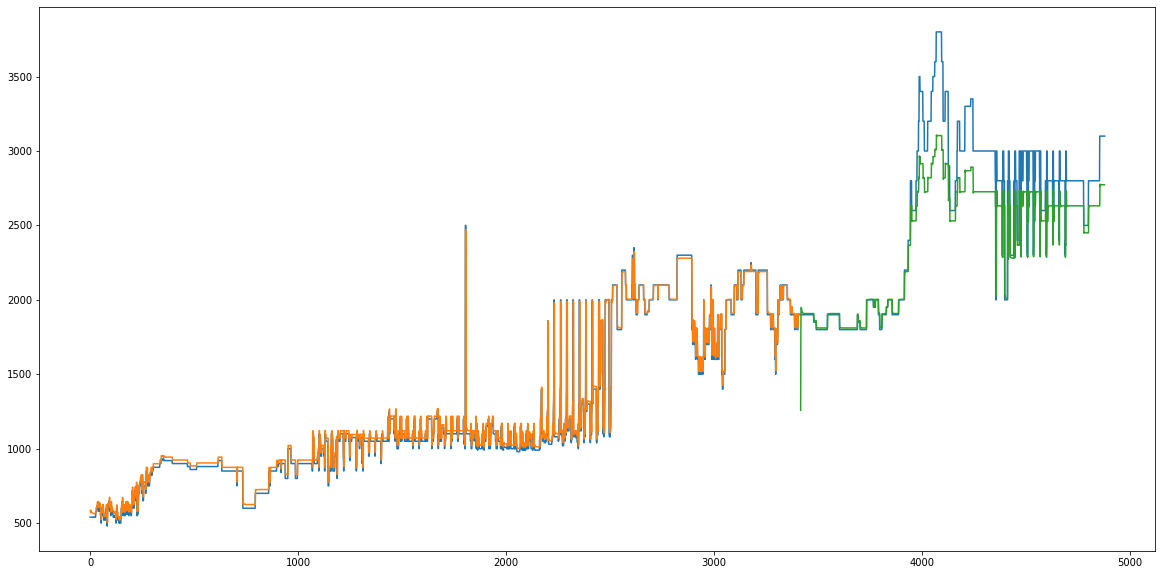

In [40]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()